<a href="https://colab.research.google.com/github/Durgesh8166/Email_spam_classifier/blob/main/Email_spam_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [ ]:
data=pd.read_csv('/content/spam.csv',sep=',',encoding='latin-1')

In [ ]:
data.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4369,spam,Do you want a new Video handset? 750 any time ...,NaN,NaN,NaN
501,ham,When can Ì_ come out?,NaN,NaN,NaN
2751,ham,Play w computer? Aiyah i tok 2 u lor?,NaN,NaN,NaN
584,ham,So how's scotland. Hope you are not over showi...,NaN,NaN,NaN
2962,ham,You dont know you jabo me abi.,NaN,NaN,NaN
5043,ham,"Dunno, my dad said he coming home 2 bring us o...",NaN,NaN,NaN
3408,ham,Whats that coming over the hill..... Is it a m...,NaN,NaN,NaN
5183,ham,"Fuuuuck I need to stop sleepin, sup",NaN,NaN,NaN
3515,ham,"Well, I was about to give up cos they all said...",NaN,NaN,NaN
2544,ham,She is our sister.. She belongs 2 our family.....,NaN,NaN,NaN


In [ ]:
data.shape

(5572, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#unnamed 2,unnamed 3,unnamed 4 not useful
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
#v1->target
#v2->text

In [ ]:
data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [ ]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.isnull().sum()

,0
target,0
text,0


In [ ]:
data.duplicated().sum()

np.int64(403)

In [ ]:
data=data.drop_duplicates(keep='first')


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
data['target']=encoder.fit_transform(data['target'])

/tmp/ipython-input-122254741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target']=encoder.fit_transform(data['target'])


In [ ]:
data['target'].value_counts()

,count
target,
0,4516
1,653


([<matplotlib.patches.Wedge at 0x7a421d3a8f90>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

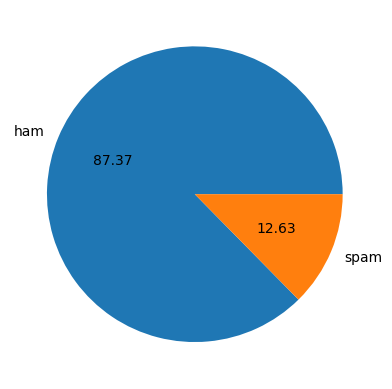

In [ ]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(),labels=encoder.classes_,autopct='%0.2f')


In [ ]:
import os

# List all Python files in current directory
print("Python files in current directory:")
for file in os.listdir():
    if file.endswith(".py"):
        print(file)



Python files in current directory:


In [ ]:
import nltk


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [ ]:
stop = list(stopwords.words('english'))
stop.remove('not')

In [ ]:
# Step 4: Text Preprocessing
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'\d+', '', text)      # remove digits
    return text

In [ ]:
data['clean_text'] = data['text'].apply(clean_text)

/tmp/ipython-input-2817257527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_text'] = data['text'].apply(clean_text)


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
data['nums_chr']=data['text'].apply(len)

/tmp/ipython-input-1313649806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['nums_chr']=data['text'].apply(len)


In [ ]:
data['nums_words']=data['text'].apply(lambda x:len(x.split()))

/tmp/ipython-input-3720434356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['nums_words']=data['text'].apply(lambda x:len(x.split()))


In [ ]:
data['num_sentences'] = data['text'].apply(lambda x: x.count('.') + 1)



/tmp/ipython-input-3936552853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_sentences'] = data['text'].apply(lambda x: x.count('.') + 1)


In [ ]:
data

,target,text,clean_text,nums_chr,nums_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,111,20,9
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni,29,6,7
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...,155,28,2
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,49,11,7
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,61,13,1
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,this is the nd time we have tried contact u u...,161,30,5
5568,0,Will Ì_ b going to esplanade fr home?,will ì_ b going to esplanade fr home,37,8,1
5569,0,"Pity, * was in mood for that. So...any other s...",pity was in mood for that soany other suggest...,57,10,5
5570,0,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like id ...,125,26,1


<Axes: xlabel='nums_chr', ylabel='Count'>

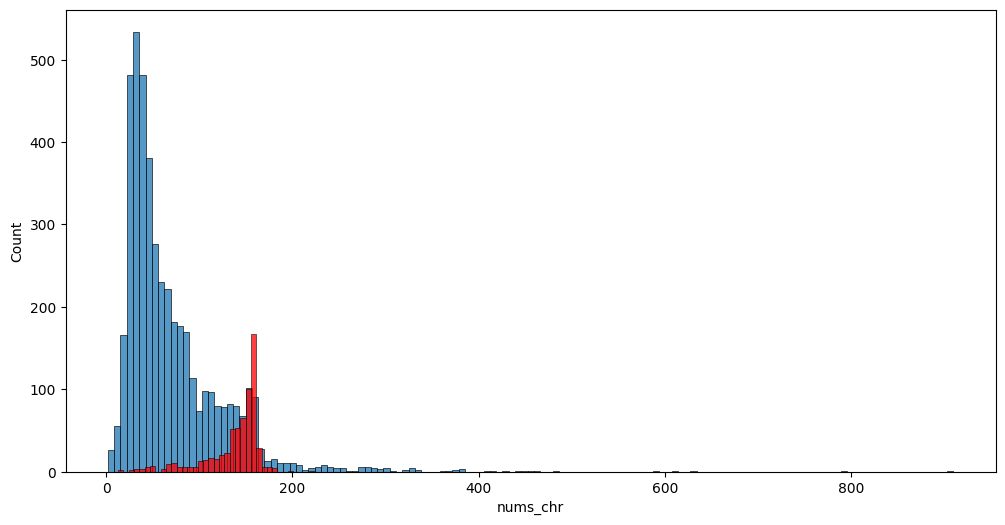

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['nums_chr'])
sns.histplot(data[data['target'] == 1]['nums_chr'],color='red')

<Axes: xlabel='nums_words', ylabel='Count'>

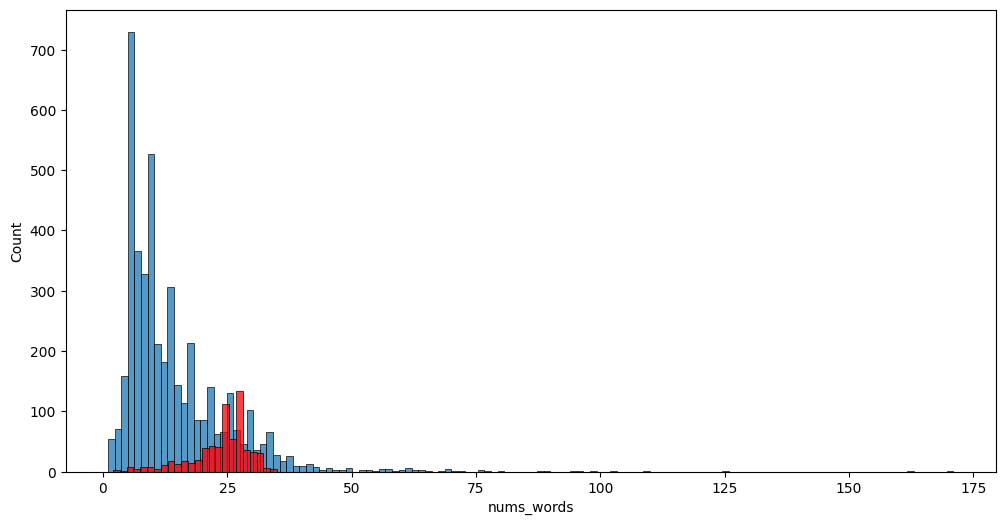

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['nums_words'])
sns.histplot(data[data['target'] == 1]['nums_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

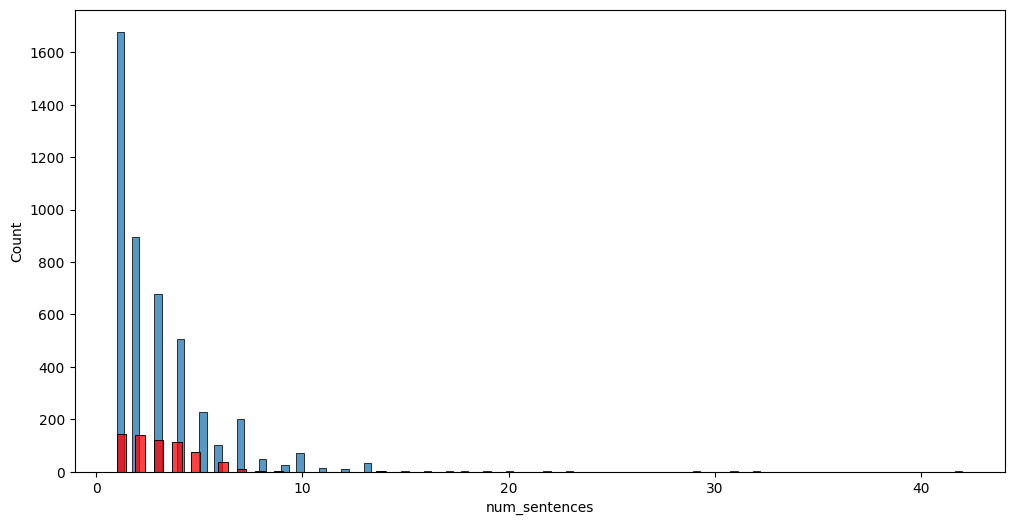

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['num_sentences'])
sns.histplot(data[data['target'] == 1]['num_sentences'],color='red')

In [ ]:
data

,target,text,clean_text,nums_chr,nums_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,111,20,9
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni,29,6,7
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...,155,28,2
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,49,11,7
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,61,13,1
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,this is the nd time we have tried contact u u...,161,30,5
5568,0,Will Ì_ b going to esplanade fr home?,will ì_ b going to esplanade fr home,37,8,1
5569,0,"Pity, * was in mood for that. So...any other s...",pity was in mood for that soany other suggest...,57,10,5
5570,0,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like id ...,125,26,1


In [ ]:
data[data['target']==0][['nums_chr','nums_words','num_sentences']].describe()

,nums_chr,nums_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,2.916519
std,56.358207,11.116240,2.638732
min,2.000000,1.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,2.000000
75%,90.000000,18.000000,4.000000
max,910.000000,171.000000,42.000000


In [ ]:
data[data['target']==1][['nums_chr','nums_words','num_sentences']].describe()

,nums_chr,nums_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,3.055130
std,30.137753,5.967672,1.725848
min,13.000000,2.000000,1.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,14.000000


In [ ]:
y=data['target']

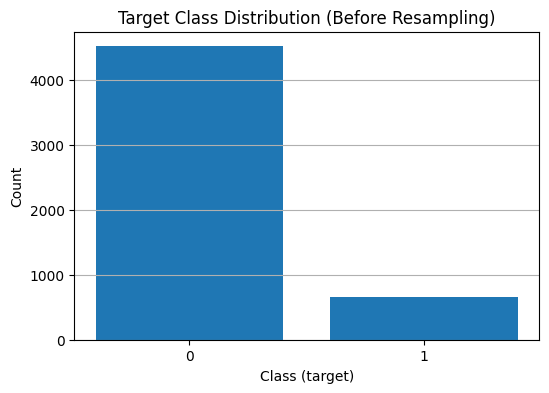

In [ ]:
# 1. Target class distribution
plt.figure(figsize=(6, 4))
classes = y.value_counts()
plt.bar(classes.index.astype(str), classes.values)
plt.title("Target Class Distribution (Before Resampling)")
plt.xlabel("Class (target)")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()


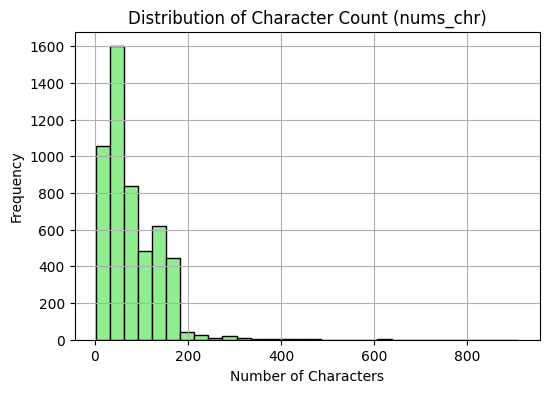

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(data['nums_chr'], bins=30, color='lightgreen', edgecolor='black')
plt.title("Distribution of Character Count (nums_chr)")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

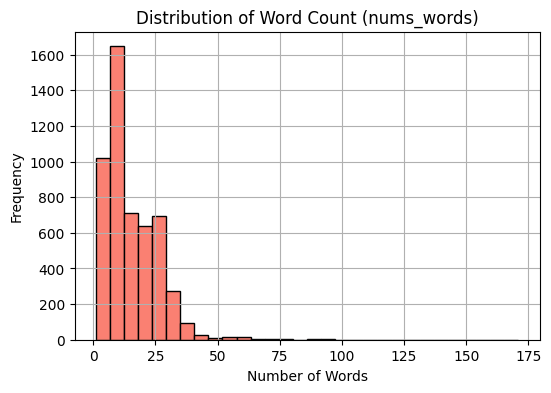

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(data['nums_words'], bins=30, color='salmon', edgecolor='black')
plt.title("Distribution of Word Count (nums_words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


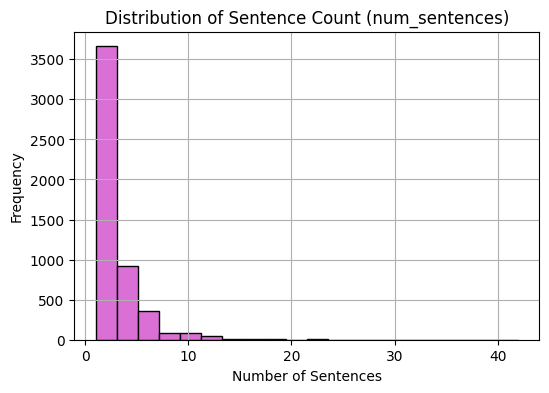

In [ ]:
# Sentence count histogram
plt.figure(figsize=(6, 4))
plt.hist(data['num_sentences'], bins=20, color='orchid', edgecolor='black')
plt.title("Distribution of Sentence Count (num_sentences)")
plt.xlabel("Number of Sentences")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer=TfidfVectorizer()

In [ ]:
vectorizer = CountVectorizer(stop_words='english')

In [ ]:
x=vectorizer.fit_transform(data['clean_text']).toarray()

In [ ]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#  Get feature names
feature_names = vectorizer.get_feature_names_out()
feature_names

array(['____', 'aa', 'aah', ..., 'ûï', 'ûïharry', 'ûò'], dtype=object)

In [ ]:
X_numeric = data[['nums_chr', 'nums_words', 'num_sentences']].values
X_combined = np.hstack((x, X_numeric))

In [ ]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
feature_names = vectorizer.get_feature_names_out()
columns = list(feature_names) + ['nums_chr', 'nums_words', 'num_sentences']

Text(0.5, 1.0, 'Class Distribution Before Resampling')

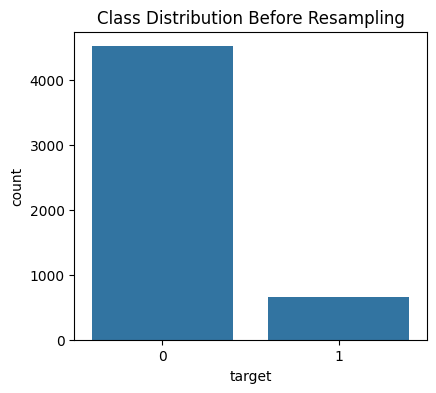

In [ ]:
  plt.figure(figsize=(10,4))
  plt.subplot(1, 2, 1)
  sns.countplot(x=y)
  plt.title("Class Distribution Before Resampling")

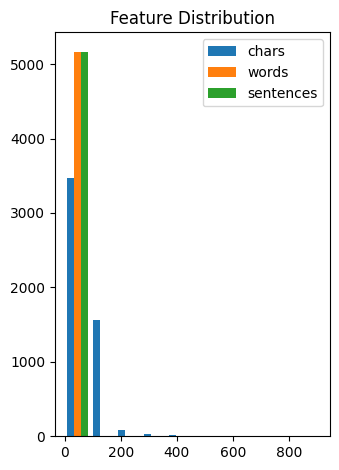

In [ ]:
plt.subplot(1, 2, 2)
plt.hist([data['nums_chr'], data['nums_words'], data['num_sentences']], label=['chars', 'words', 'sentences'])
plt.legend()
plt.title("Feature Distribution")
plt.tight_layout()
plt.show()

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
smt=SMOTETomek(random_state=42)

In [ ]:
X_resampled, y_resampled = smt.fit_resample(X_combined, y)

In [ ]:
X_resampled

array([[  0,   0,   0, ..., 111,  20,   9],
       [  0,   0,   0, ...,  29,   6,   7],
       [  0,   0,   0, ..., 155,  28,   2],
       ...,
       [  0,   0,   0, ..., 145,  23,   3],
       [  0,   0,   0, ...,  41,   7,   2],
       [  0,   0,   0, ..., 144,  31,   5]])

In [ ]:
X_resampled.shape,y_resampled.shape

((9020, 8326), (9020,))

In [ ]:
y_resampled.value_counts()

,count
target,
0,4510
1,4510


In [ ]:
y_resampled_df = pd.Series(y_resampled, name='target')

In [ ]:
y_resampled_df

,target
0,0
1,0
2,1
3,0
4,0
...,...
9015,1
9016,1
9017,1
9018,1


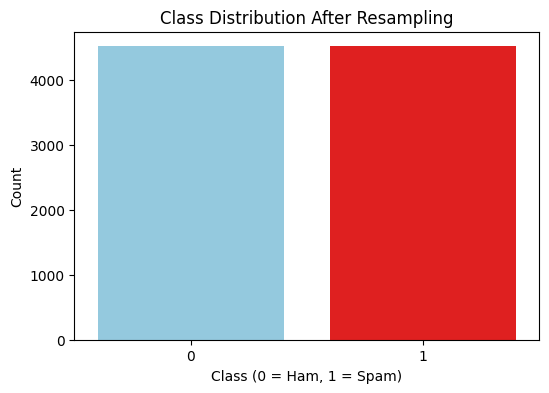

In [ ]:
  # After resampling
  plt.figure(figsize=(6, 4))

  # For numeric labels: 0 = ham, 1 = spam
  palette_colors = {0: 'skyblue', 1: 'red'}

  # Set hue to x and disable legend to remove warning
  sns.countplot(x=y_resampled, palette=palette_colors, hue=y_resampled, legend=False)

  plt.title("Class Distribution After Resampling")
  plt.xlabel("Class (0 = Ham, 1 = Spam)")
  plt.ylabel("Count")
  plt.show()

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(data[data['target'] == 1]['clean_text'].str.cat(sep=" "))

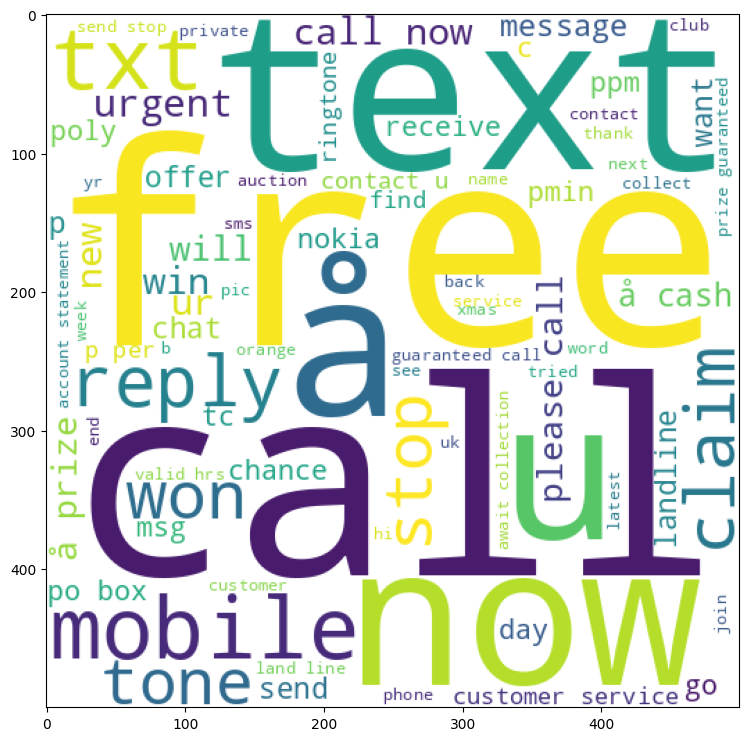

In [ ]:
plt.figure(figsize=(18,9))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(data[data['target'] == 0]['clean_text'].str.cat(sep=" "))

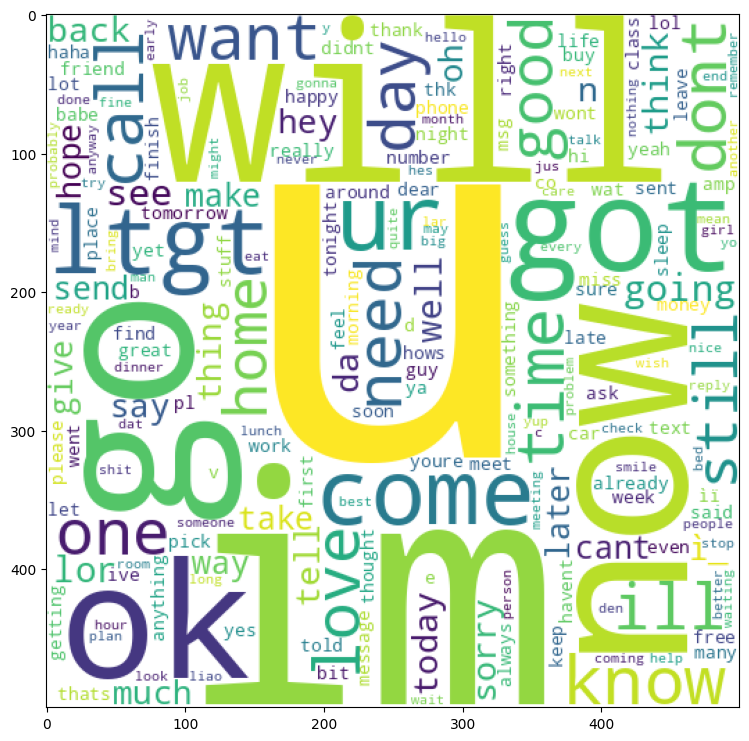

In [ ]:
plt.figure(figsize=(18,9))
plt.imshow(ham_wc)

In [ ]:
spam_corpus = []
for msg in data[data['target'] == 1]['clean_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

/tmp/ipython-input-2177792340.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=common_words, palette='mako')


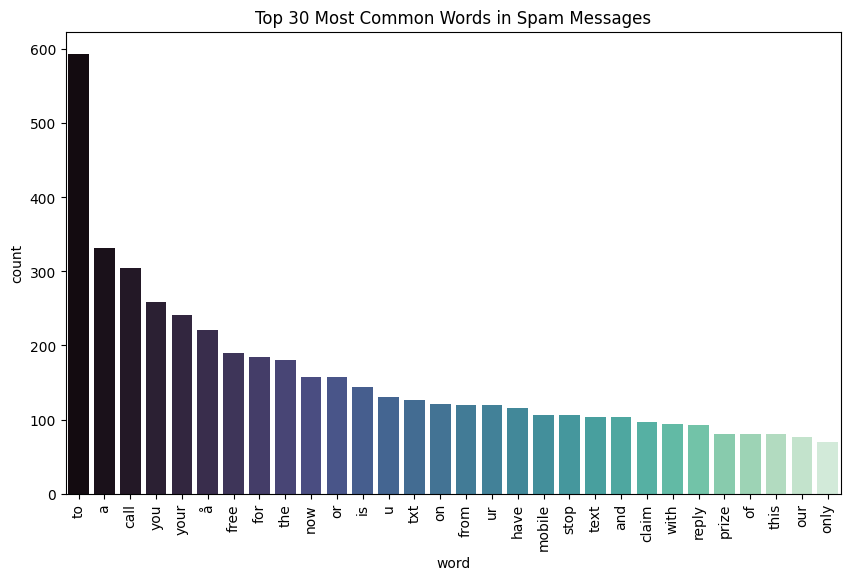

In [ ]:
from collections import Counter
common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot with keyword arguments
plt.figure(figsize=(10, 6))
sns.barplot(x='word', y='count', data=common_words, palette='mako')
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words in Spam Messages")
plt.show()

In [ ]:
ham_corpus = []
for msg in data[data['target'] == 0]['clean_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

/tmp/ipython-input-322107795.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=common_words, palette='mako')


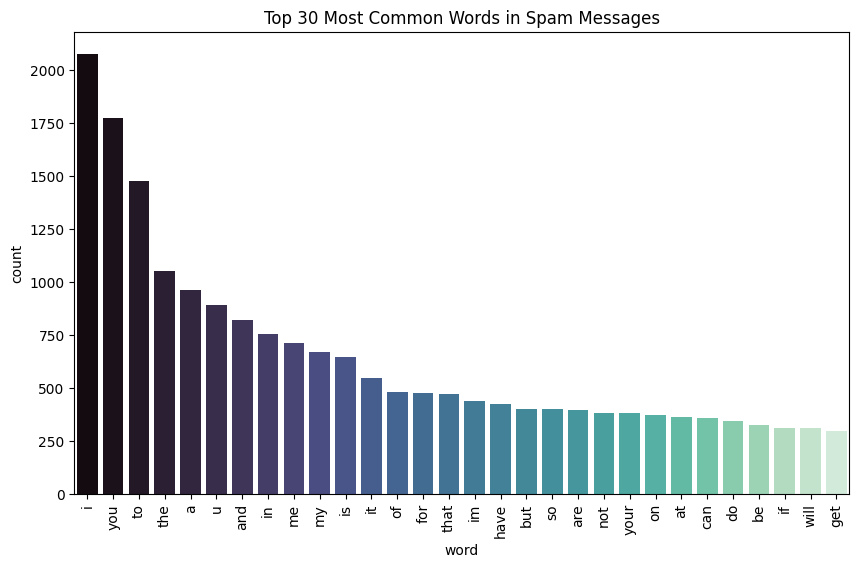

In [ ]:
common_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Plot with keyword arguments
plt.figure(figsize=(10, 6))
sns.barplot(x='word', y='count', data=common_words, palette='mako')
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words in Spam Messages")
plt.show()

In [ ]:
data.shape

(5169, 6)

Model Building




In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(x_train, y_train)      # Train the model correctly
y_pred1 = gnb.predict(x_test)  # Predict using test data


In [ ]:
print(y_pred1)

[0 0 1 ... 0 1 1]


In [ ]:
print(accuracy_score(y_test,y_pred1))


0.9262749445676275


In [ ]:
print(confusion_matrix(y_test,y_pred1))

[[791 119]
 [ 14 880]]


In [ ]:
print(precision_score(y_test,y_pred1))

0.8808808808808809


In [ ]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9750554323725056
[[872  38]
 [  7 887]]
0.9589189189189189


In [ ]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9412416851441242
[[811  99]
 [  7 887]]
0.8995943204868154


In [ ]:
# tfidf --> MNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.4955654101995565, 0.4955654101995565)

In [ ]:
accuracy_scores = []
precision_scores = []

In [ ]:
for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.4955654101995565
Precision -  0.4955654101995565
For  KN
Accuracy -  0.8337028824833703
Precision -  0.7516949152542373
For  NB
Accuracy -  0.9750554323725056
Precision -  0.9589189189189189
For  DT
Accuracy -  0.905210643015521
Precision -  0.889967637540453
For  LR
Accuracy -  0.9617516629711752
Precision -  0.961926091825308
For  RF
Accuracy -  0.9667405764966741
Precision -  0.9436170212765957
For  AdaBoost
Accuracy -  0.8719512195121951
Precision -  0.861504907306434
For  BgC
Accuracy -  0.9456762749445676
Precision -  0.9180672268907563
For  ETC
Accuracy -  0.9611973392461197
Precision -  0.9355179704016914
For  GBDT
Accuracy -  0.9151884700665188
Precision -  0.9148936170212766
For  xgb
Accuracy -  0.9584257206208425
Precision -  0.9627118644067797


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
10,xgb,0.958426,0.962712
4,LR,0.961752,0.961926
2,NB,0.975055,0.958919
5,RF,0.966741,0.943617
8,ETC,0.961197,0.935518
7,BgC,0.945676,0.918067
9,GBDT,0.915188,0.914894
3,DT,0.905211,0.889968
6,AdaBoost,0.871951,0.861505
1,KN,0.833703,0.751695


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

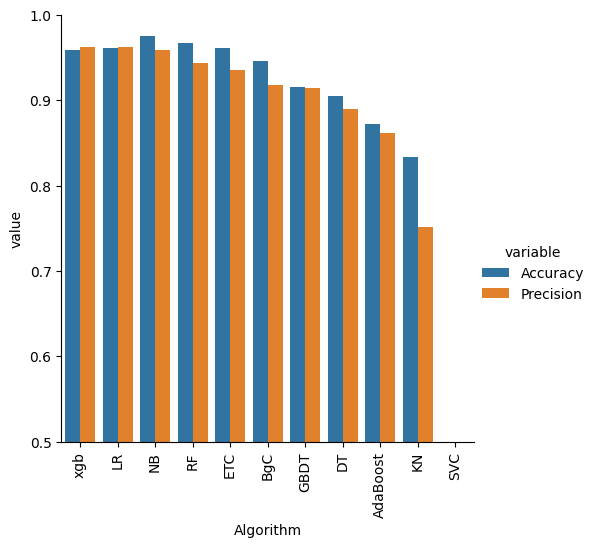

In [ ]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [ ]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,xgb,0.958426,0.962712,0.958426,0.962712,0.958426,0.962712,0.958426,0.962712
1,LR,0.961752,0.961926,0.961752,0.961926,0.961752,0.961926,0.961752,0.961926
2,NB,0.975055,0.958919,0.975055,0.958919,0.975055,0.958919,0.975055,0.958919
3,RF,0.966741,0.943617,0.966741,0.943617,0.966741,0.943617,0.966741,0.943617
4,ETC,0.961197,0.935518,0.961197,0.935518,0.961197,0.935518,0.961197,0.935518
5,BgC,0.945676,0.918067,0.945676,0.918067,0.945676,0.918067,0.945676,0.918067
6,GBDT,0.915188,0.914894,0.915188,0.914894,0.915188,0.914894,0.915188,0.914894
7,DT,0.905211,0.889968,0.905211,0.889968,0.905211,0.889968,0.905211,0.889968
8,AdaBoost,0.871951,0.861505,0.871951,0.861505,0.871951,0.861505,0.871951,0.861505
9,KN,0.833703,0.751695,0.833703,0.751695,0.833703,0.751695,0.833703,0.751695


In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9767184035476718
Precision 0.961038961038961


In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(x_train[:1000], y_train[:1000])  # check time

StackingClassifier(estimators=[('svm',
                                SVC(gamma=1.0, kernel='sigmoid',
                                    probability=True)),
                               ('nb', MultinomialNB()),
                               ('et',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=RandomForestClassifier())

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9700665188470067
Precision 0.9751131221719457


In [ ]:
import pickle
pickle.dump(vectorizer,open('vectorizer.pkl','wb'))


In [ ]:
pickle.dump(mnb,open('model.pkl','wb'))